This project is created by jamal hussain shah 
Concrete Strength Prediction! R2(0.87)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_csv("concrete_data.csv")

In [6]:
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
dataset.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
dataset.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
corr = dataset.corr()
corr

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


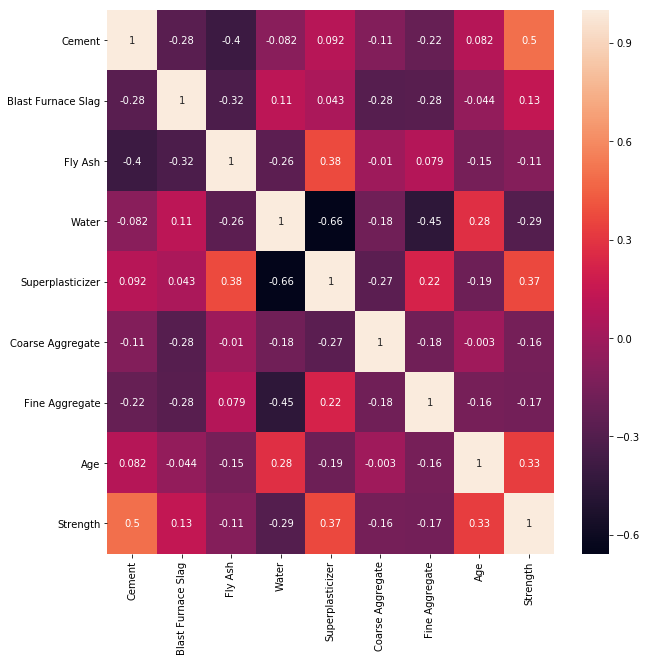

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True)

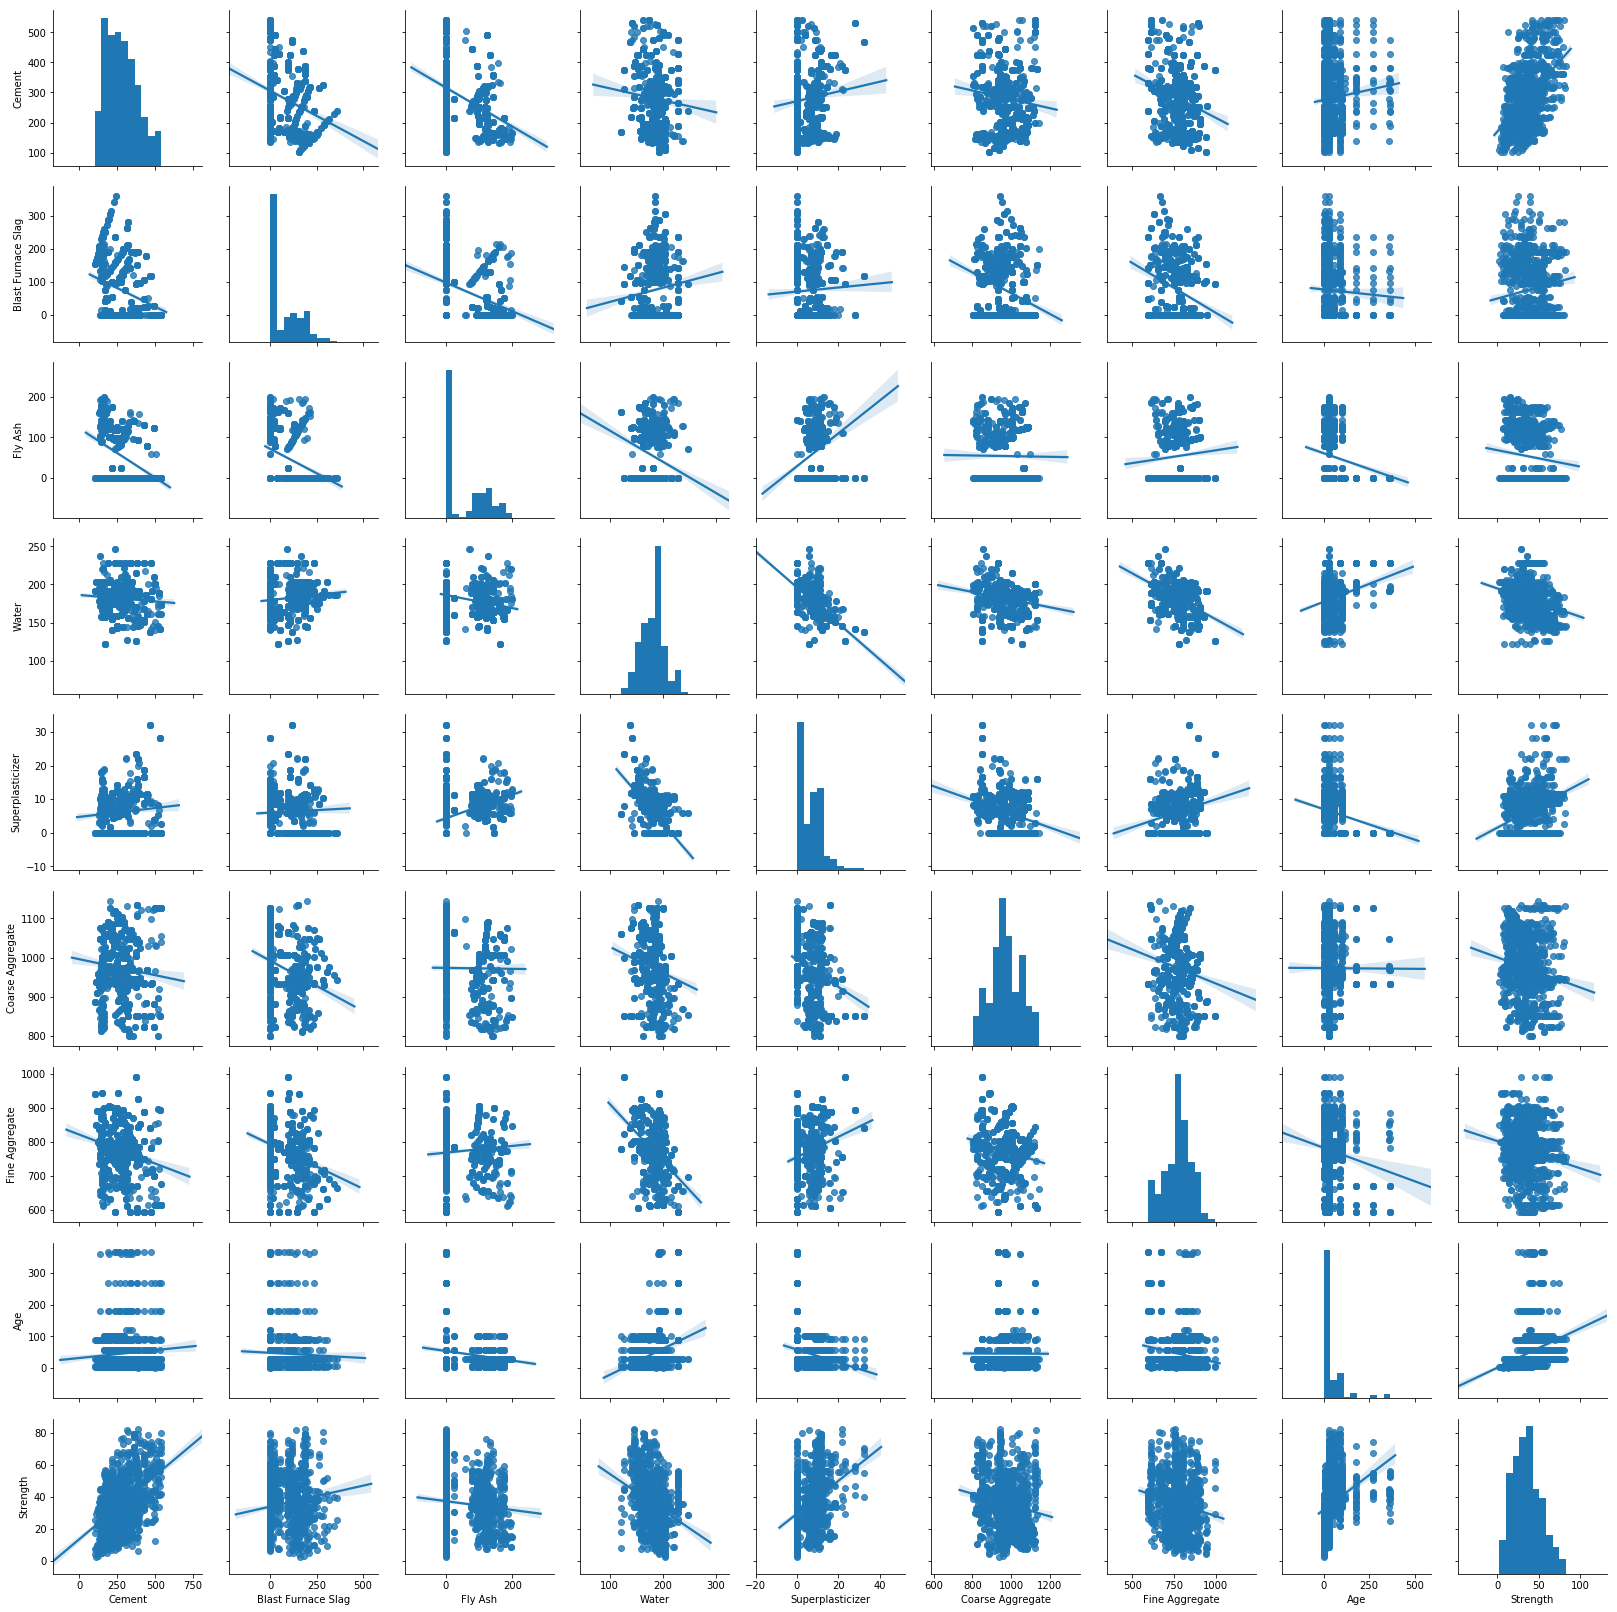

In [12]:
fig = sns.pairplot(dataset, kind = "reg")
fig.savefig("pairplot.png")

In [23]:
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(df[col_name], ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(df[col_name], ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    print()
    plt.show()
    return df

<Figure size 1440x1440 with 0 Axes>

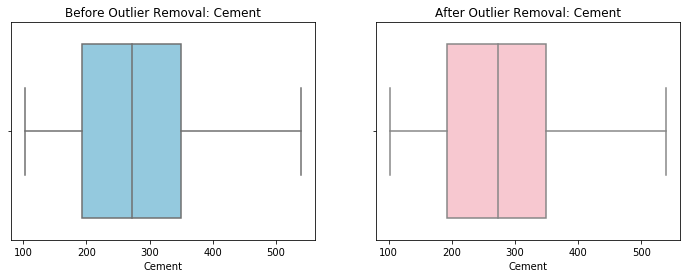

<Figure size 1440x1440 with 0 Axes>

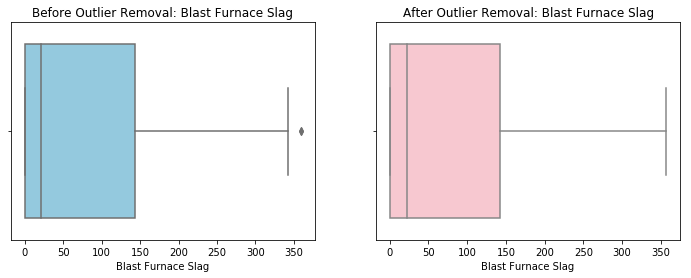

<Figure size 1440x1440 with 0 Axes>

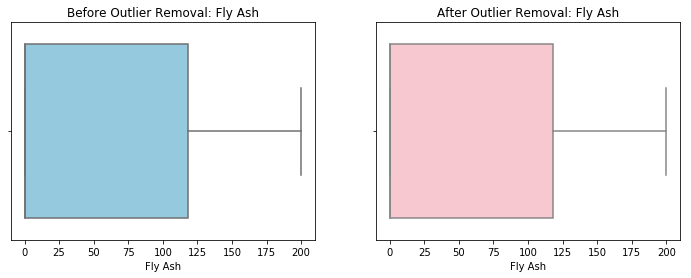

<Figure size 1440x1440 with 0 Axes>

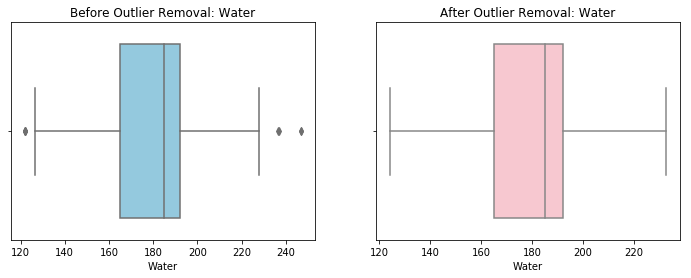

<Figure size 1440x1440 with 0 Axes>

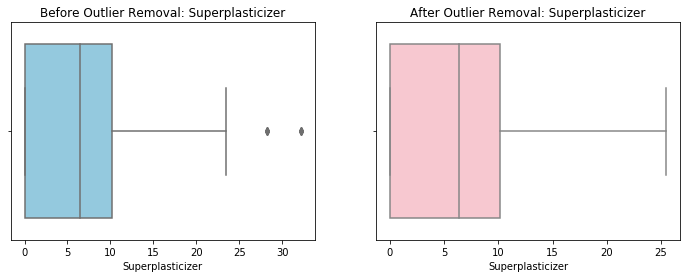

<Figure size 1440x1440 with 0 Axes>

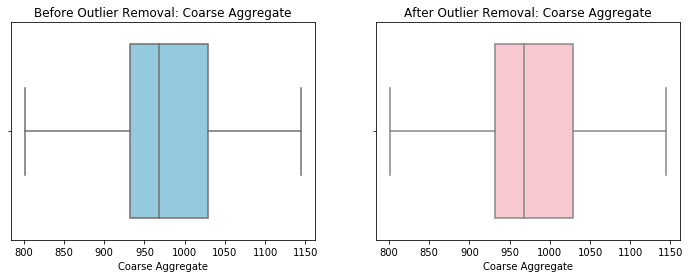

<Figure size 1440x1440 with 0 Axes>

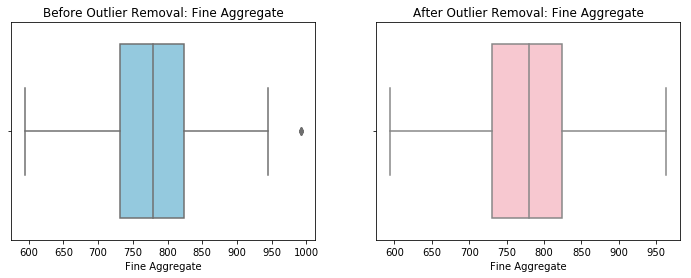

<Figure size 1440x1440 with 0 Axes>

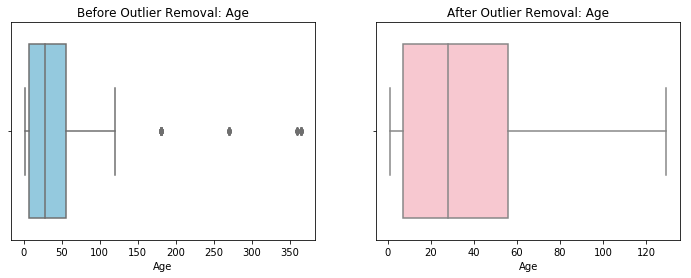

In [24]:
for col in dataset.select_dtypes(exclude="object").columns[:-1]:
    dataset = remove_outlier(dataset,col)

In [26]:
# defining the Target and Predictors Variables

X = dataset.drop("Strength", axis = 1).values
y = dataset["Strength"]

In [27]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.2)

In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(824, 8) (824,) (206, 8) (206,)


In [30]:
# Normalizing the data
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [31]:
# Building the model
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 Score :", r2_score(y_test, y_pred))
    print("Mean Squared Error :", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error :", mean_squared_error(y_test, y_pred)**0.5)
    sns.regplot(y_test, y_pred)

R2 Score : 0.6946937864285301
Mean Squared Error : 92.37644594548381
Root Mean Squared Error : 9.611266615045272


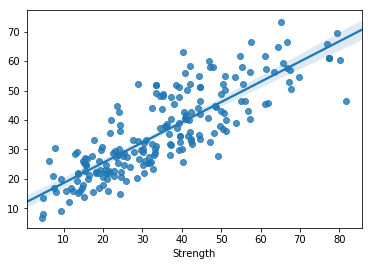

In [32]:
model_train(LinearRegression(), X_train, X_test, y_train, y_test)

R2 Score : 0.690033143586035
Mean Squared Error : 93.78661580928902
Root Mean Squared Error : 9.684349013190769


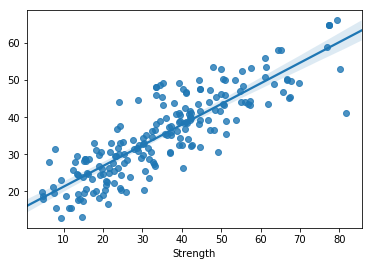

In [33]:
# Support Vector Regressor
model_train(SVR(), X_train, X_test, y_train, y_test)

R2 Score : 0.8588365836871326
Mean Squared Error : 42.71178939976869
Root Mean Squared Error : 6.53542572444739


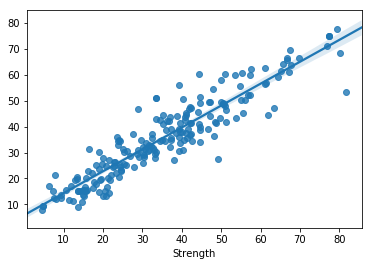

In [34]:
# Random Forest Regressor
model_train(RandomForestRegressor(), X_train, X_test, y_train, y_test)

R2 Score : 0.8505069522572436
Mean Squared Error : 45.23208447836466
Root Mean Squared Error : 6.725480241467122


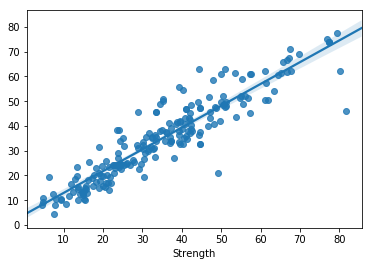

In [35]:
# XGBoost Regressor
model_train(XGBRegressor(), X_train, X_test, y_train, y_test)

In [36]:
# Random Forest Regressor has performed well for the dataset with an r-squared value of 87% 